In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
image = Image

In [9]:
df = pd.read_csv('Iris.csv',index_col=0)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
df['Species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2},inplace=True)

In [22]:
X = df.drop(['Species'],axis=1)
y = df['Species']

In [32]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
model = DecisionTreeClassifier()
trained_model = model.fit(X,y)
y_pred = model.predict(X)
print("Accuracy:",metrics.accuracy_score(y_pred, y))


Accuracy: 1.0


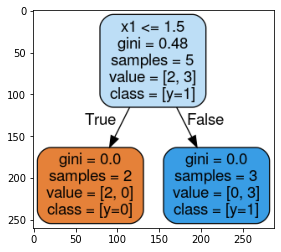

In [46]:
import pydotplus
import pydot
from IPython.display import Image
from sklearn.tree import export_graphviz
out_file = tree.export_graphviz(
    trained_model,
    feature_names   = X.columns,
    class_names     = ['[y=0]', '[y=1]', '[y=2]'],# Ascending numerical order
    filled          = True,
    rounded         = True
)
graph = pydotplus.graph_from_dot_data(out_file)
pil_im = image.open('tree.png')
im_array = np.asarray(pil_im)
plt.imshow(im_array)
plt.show()
